In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from useful_functions import import_file, remove_before, remove_zeros, make_bins, make_equal_bins, peaks_for_specific_timeframe, show_valid_peaks, make_sessions, calculate_session_averages, add_session_averages
from scipy.signal import find_peaks

In [2]:
P_01 = import_file('Alta', '2P01')
P_01.dropna(subset=['Count'], inplace=True)

In [3]:
print(P_01)

                    Date  Count
0    2024-05-01 08:04:15    0.0
1    2024-05-01 08:19:15    0.0
2    2024-05-01 08:33:23    3.0
3    2024-05-01 08:38:22   97.0
4    2024-05-01 08:43:22    0.0
...                  ...    ...
8929 2024-04-30 22:49:11    0.0
8930 2024-04-30 23:04:11    0.0
8931 2024-04-30 23:19:12    0.0
8932 2024-04-30 23:34:12    0.0
8933 2024-04-30 23:49:12    0.0

[8810 rows x 2 columns]


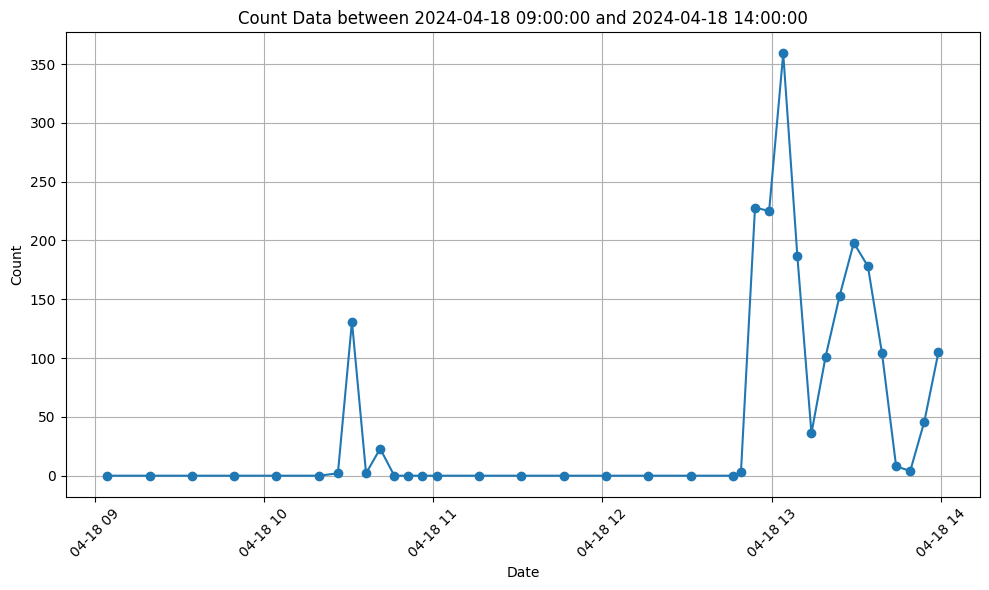

In [4]:
start_time = '2024-04-18 09:00:00'
end_time = '2024-04-18 14:00:00'
peaks_for_specific_timeframe(P_01, start_time, end_time)

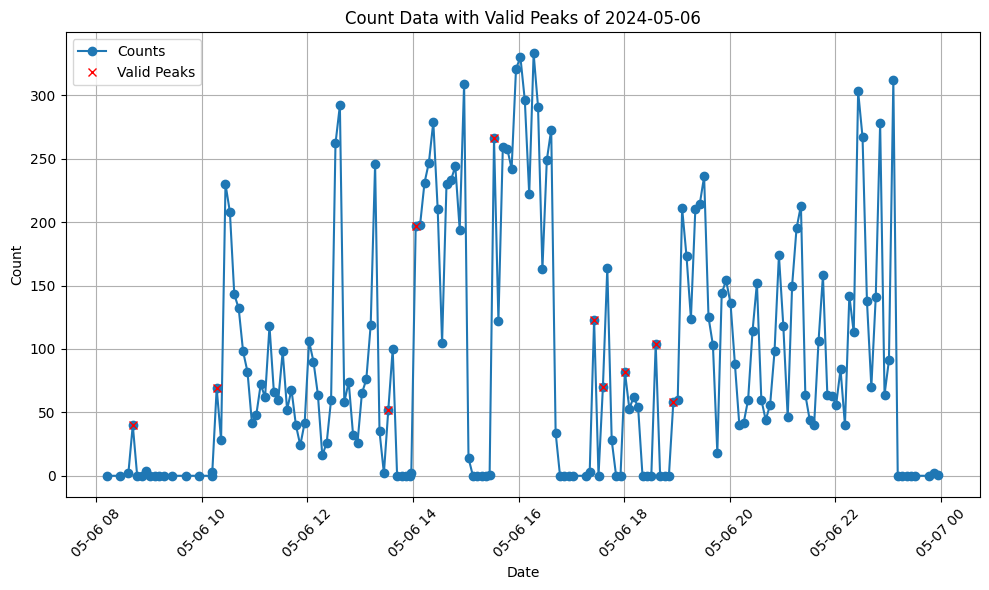

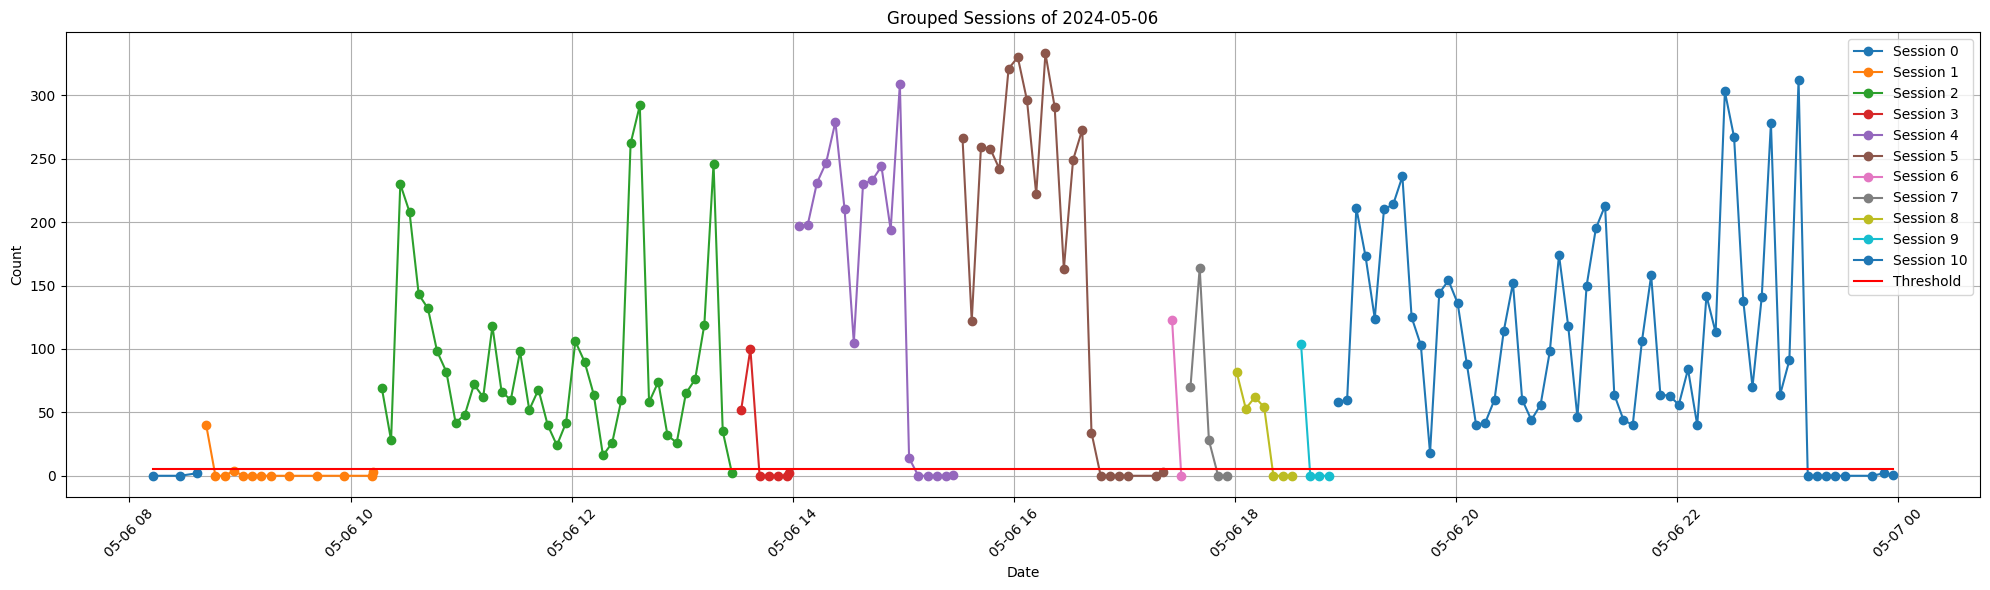

In [5]:
specific_day = '2024-05-06'
show_valid_peaks(P_01, specific_day, threshold=5, consecutive_points=1)


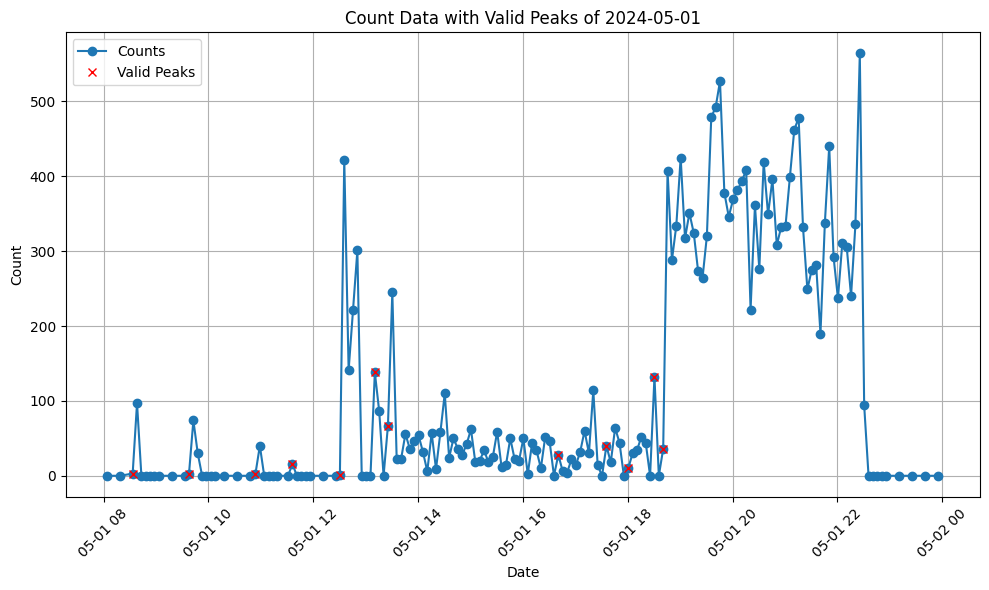

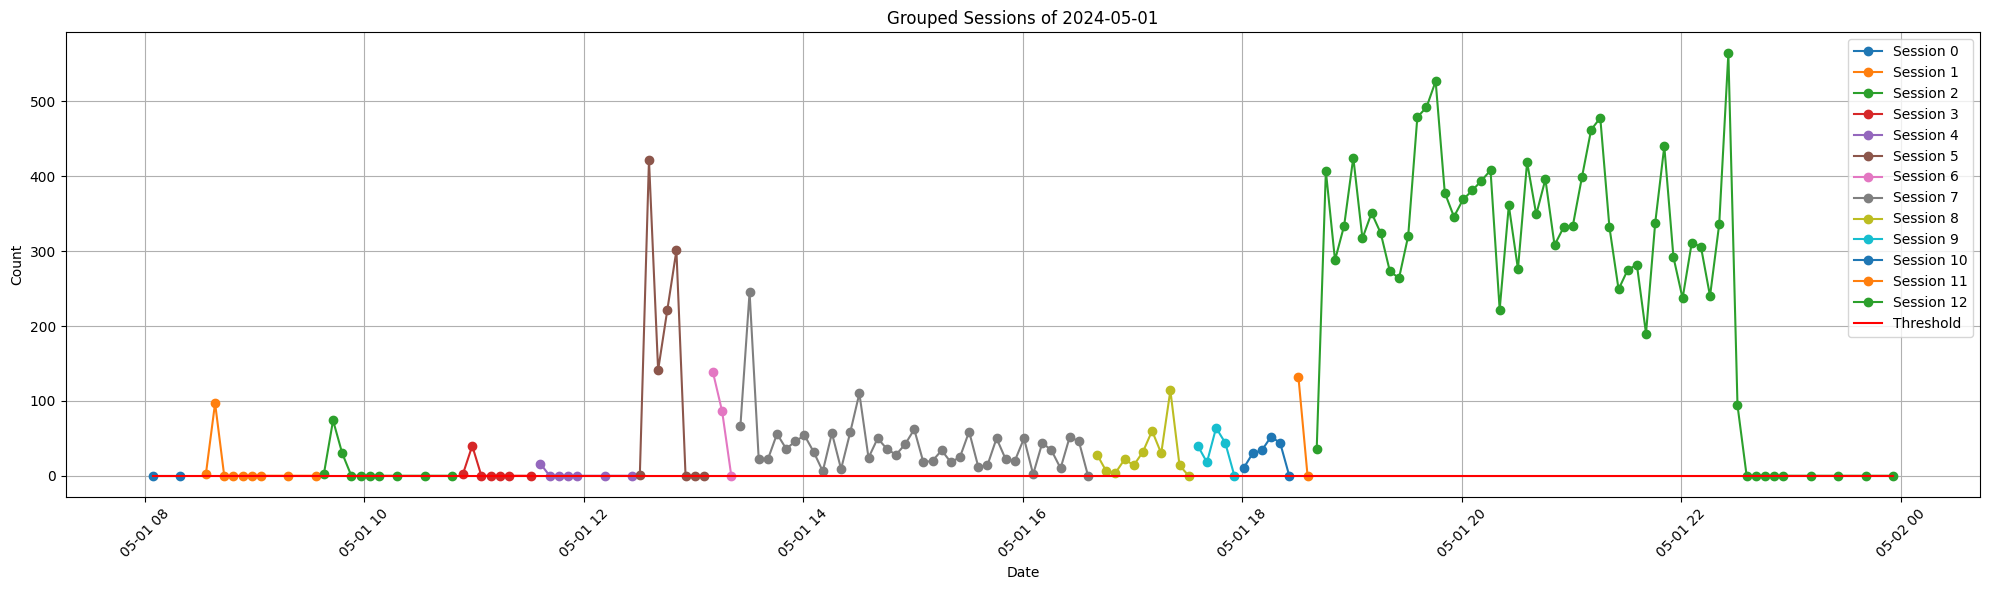

In [6]:
specific_day = '2024-05-01'
show_valid_peaks(P_01, specific_day, 0, 1)


In [7]:
B_55 = import_file('Locus', '2.B55')


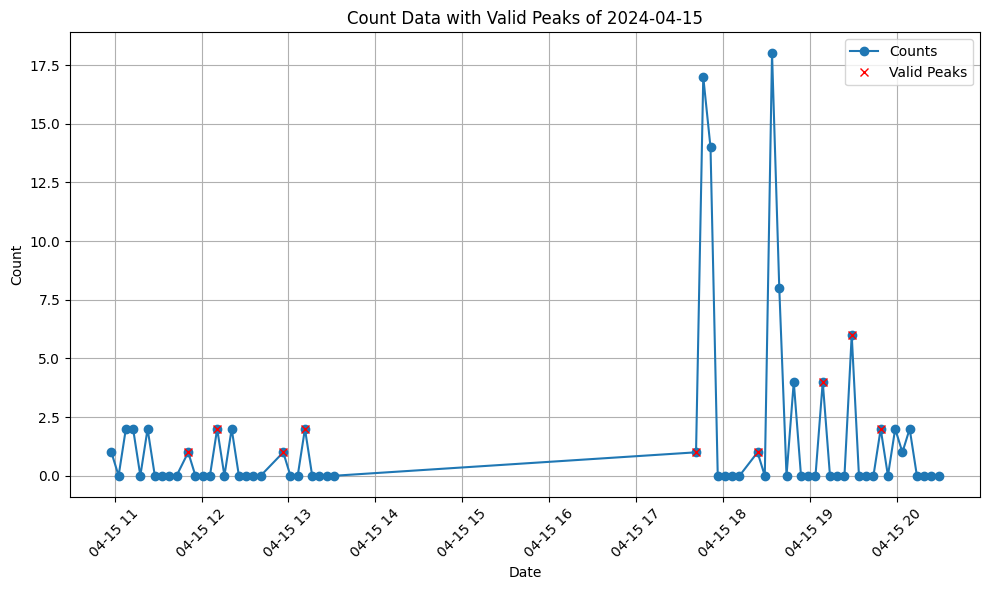

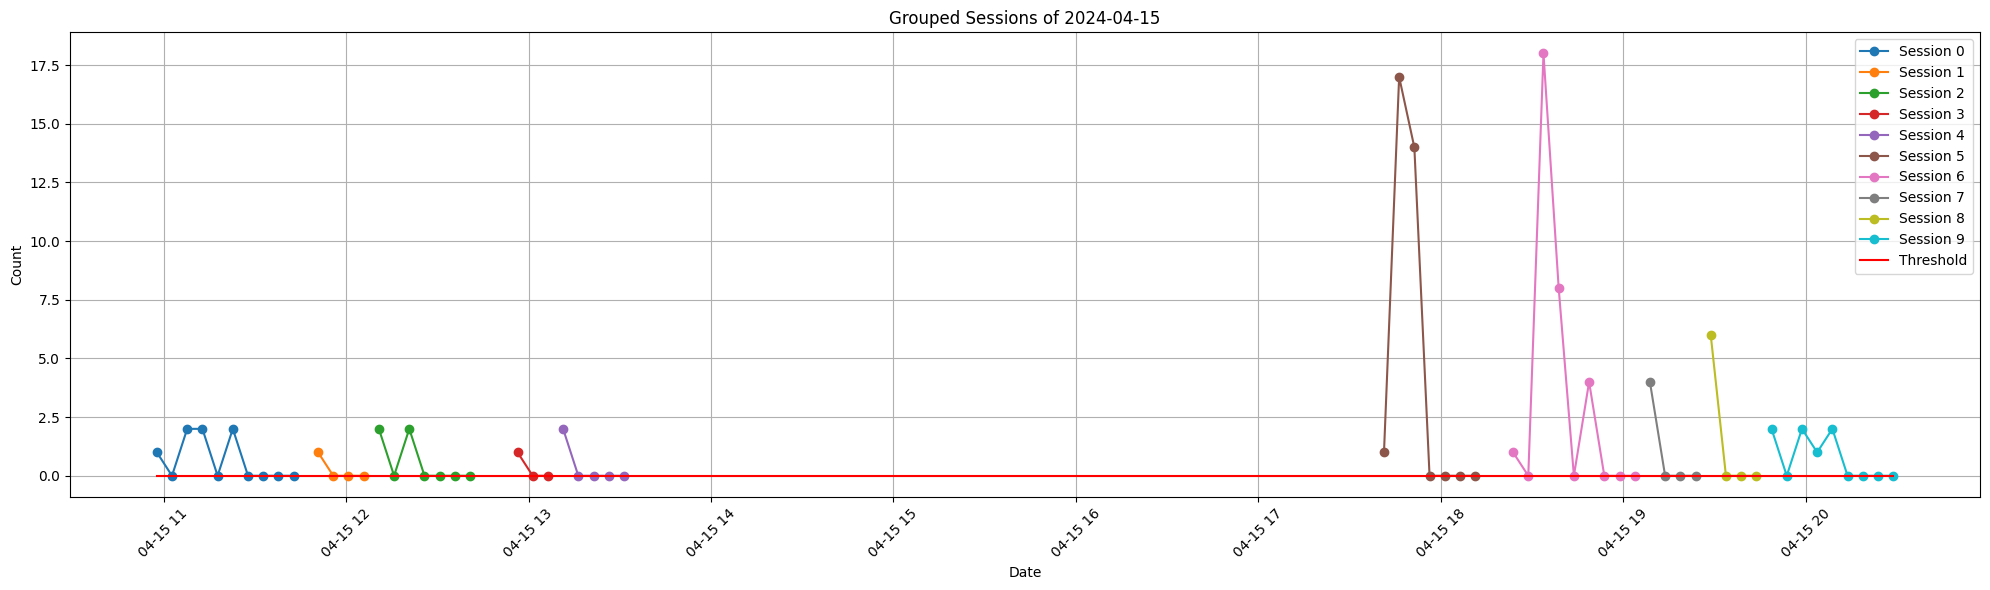

In [8]:
specific_day = '2024-04-15'
show_valid_peaks(B_55, specific_day, 0, 2)

In [9]:
new_P_01 = make_sessions(P_01, '2024-05-06', 5, 1)

In [10]:
print(new_P_01)

(                   Date  Count  Session
0   2024-05-06 08:12:36    0.0        0
1   2024-05-06 08:27:36    0.0        0
2   2024-05-06 08:36:39    2.0        0
3   2024-05-06 08:41:39   40.0        1
4   2024-05-06 08:46:39    0.0        1
..                  ...    ...      ...
173 2024-05-06 23:25:55    0.0       10
174 2024-05-06 23:30:55    0.0       10
175 2024-05-06 23:45:55    0.0       10
176 2024-05-06 23:52:11    2.0       10
177 2024-05-06 23:57:10    1.0       10

[178 rows x 3 columns], [3, 16, 55, 62, 80, 101, 103, 108, 115, 119])


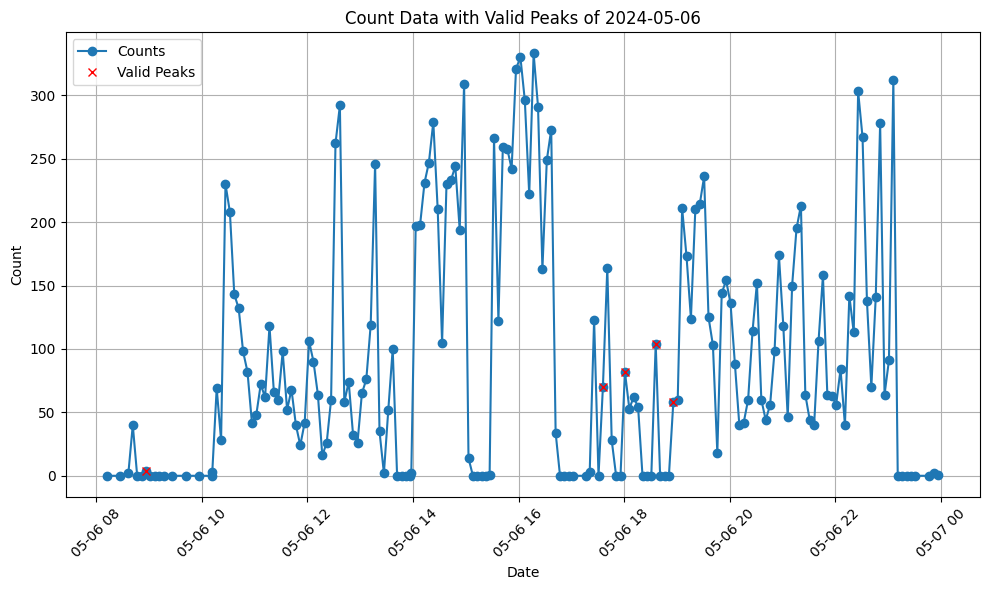

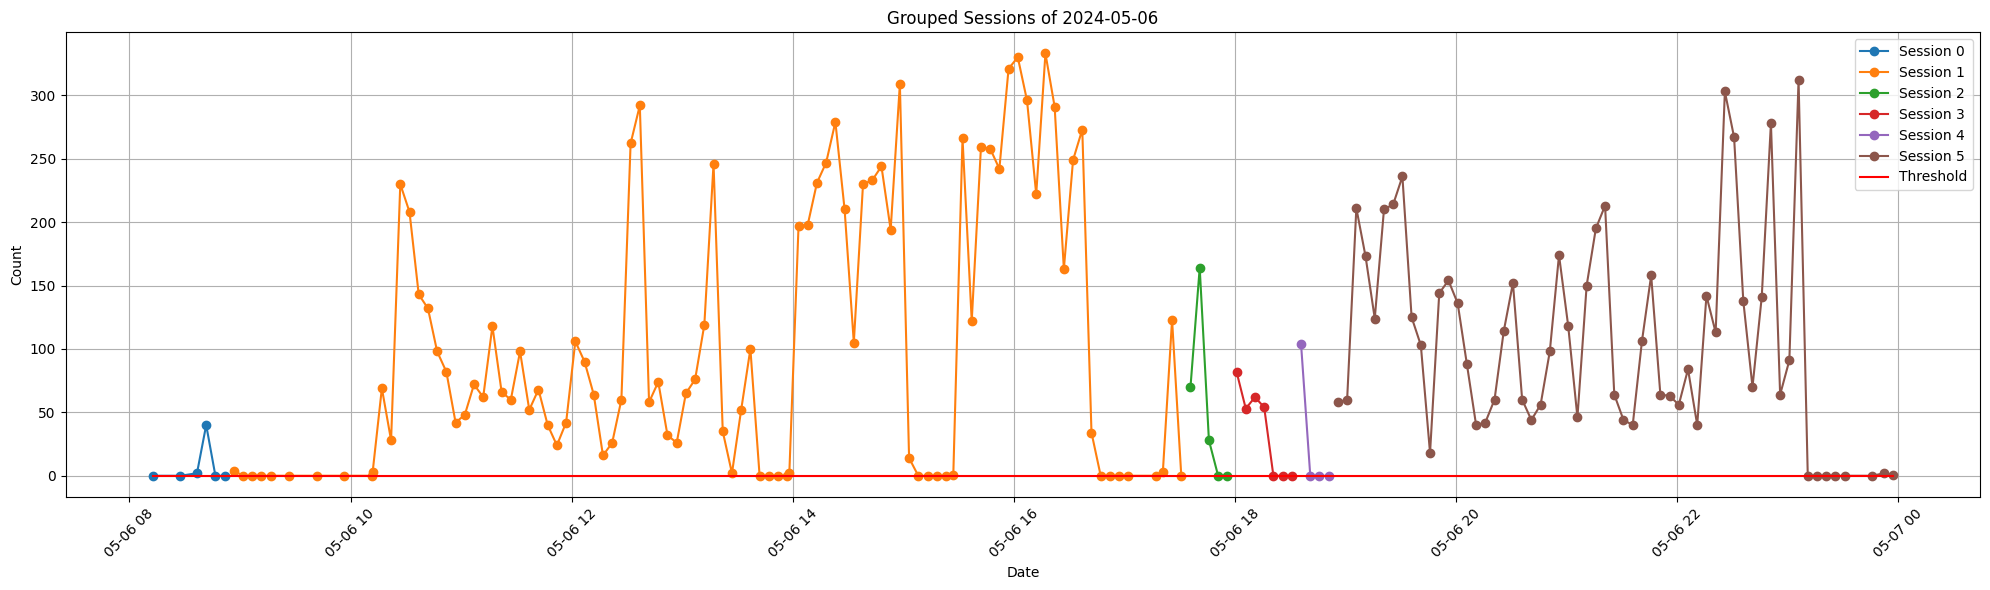

In [17]:
specific_day = '2024-05-06'
show_valid_peaks(P_01, specific_day, threshold=0, consecutive_points=1, offset=3)

In [20]:
specific_day = '2024-05-06'
filtered_data = make_sessions(P_01, specific_day, 0, 1, offset=3)[0]
print(add_session_averages(filtered_data))

                   Date  Count  Session  Session_Average
0   2024-05-06 08:12:36    0.0        0         7.000000
1   2024-05-06 08:27:36    0.0        0         7.000000
2   2024-05-06 08:36:39    2.0        0         7.000000
3   2024-05-06 08:41:39   40.0        0         7.000000
4   2024-05-06 08:46:39    0.0        0         7.000000
..                  ...    ...      ...              ...
173 2024-05-06 23:25:55    0.0        5       106.050847
174 2024-05-06 23:30:55    0.0        5       106.050847
175 2024-05-06 23:45:55    0.0        5       106.050847
176 2024-05-06 23:52:11    2.0        5       106.050847
177 2024-05-06 23:57:10    1.0        5       106.050847

[178 rows x 4 columns]


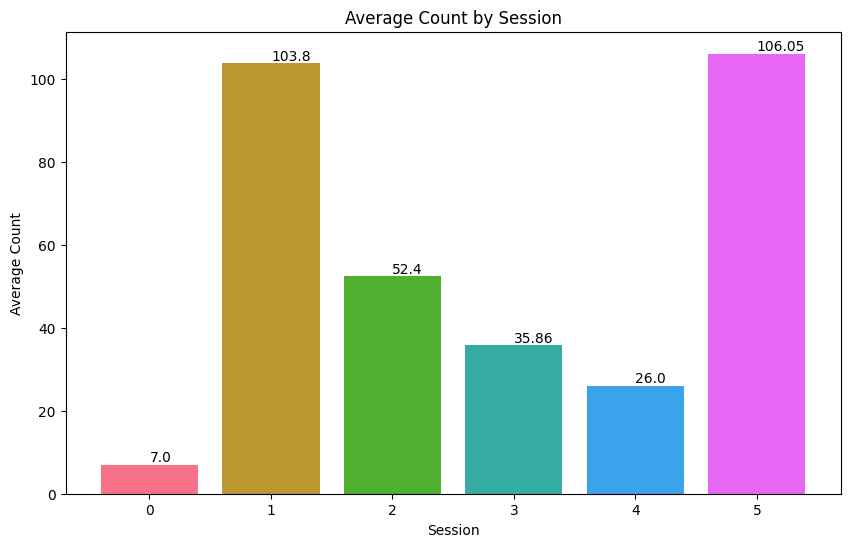

In [21]:
import seaborn as sns
# Group by 'Session' and calculate the mean of 'Count'
session_averages = filtered_data.groupby('Session')['Count'].mean().reset_index()

# Create a color palette
palette = sns.color_palette("husl", len(session_averages))

plt.figure(figsize=(10, 6))
bars = plt.bar(session_averages['Session'], session_averages['Count'], color=palette)

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom') # va: vertical alignment

plt.xlabel('Session')
plt.ylabel('Average Count')
plt.title('Average Count by Session')
plt.show()